# Projeto I - Modelagem Matemática em Finanças I - 2019
> Grupo: Gil Miranda e João Victor Fonseca<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import binomial as b

In [2]:
## Função para simular os valores da ação dados os parametros
def binomial(S0, T, dt, u, d, p):
    Si = S0
    S = []
    t = np.arange(0,T,dt)
    for ti in t:
        rnd = np.random.rand()
        if rnd < p:
            Si *= u
        else:
            Si *= d
        S.append(Si)
    return S

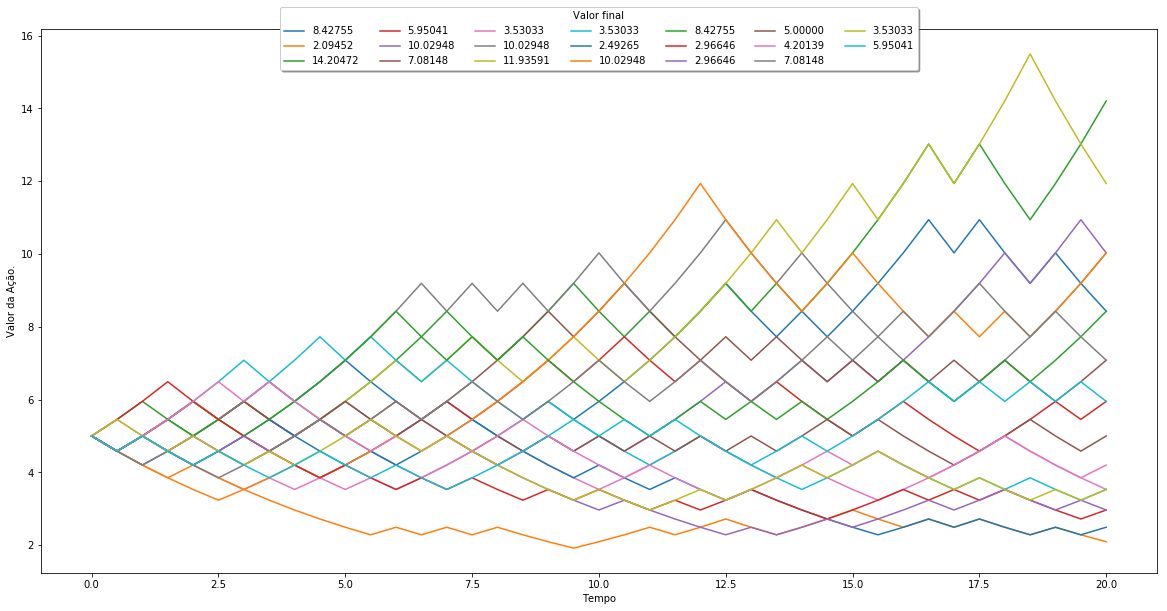

In [3]:
## Definição dos parametros
T = 20
dt = 0.5
S0 = 5
u = 120/110
d = 110/120
p = 0.5

## Construção da lista de valores da ação pelo tempo
x = [binomial(S0, T, dt, u, d, p) for i in range(0,20)]

## Inserir o valor inicial em cada lista
for i in range(0,20):
    x[i].insert(0,S0)
    
## Discretização do tempo
ts = np.linspace(0,20,41)

## Plot do gráfico
plt.figure(figsize=(20,10))
for i in range(0,20):
    plt.plot(ts,x[i],label="{0:.5f}".format(x[i][-1]))
plt.title('Simulação com 20 caminhos de valor da ação')
plt.legend(title='Valor final', loc='upper center', fancybox=True, shadow=True,
           ncol=7, bbox_to_anchor=(0.5,1.05))
plt.xlabel('Tempo')
plt.ylabel('Valor da Ação.')
plt.show()

Há um problema aqui, a maior parte dos caminhos de valor da ação estão convergindo para 0.
Portanto vamos analisar os gráficos na escala log em Y.
Identificarei cada curva com seu valor final

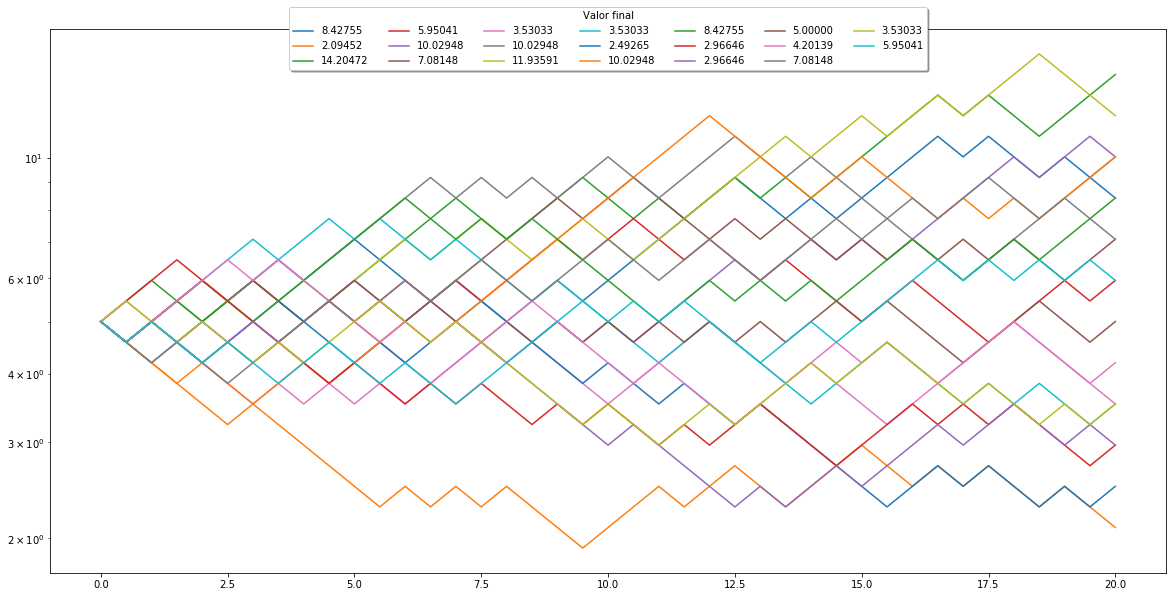

In [4]:
plt.figure(figsize=(20,10))
for i in range(0,20):
    plt.semilogy(ts,x[i],label="{0:.5f}".format(x[i][-1]))
plt.legend(title='Valor final', loc='upper center', fancybox=True, shadow=True, ncol=7, bbox_to_anchor=(0.5,1.05))
plt.title('Caminhos de valor da ação')
plt.show()

## Boxplot

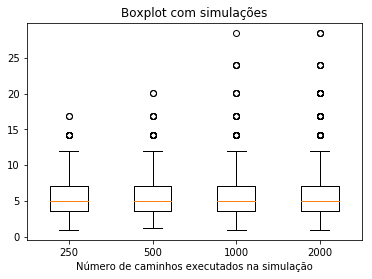

In [123]:
vs = [[],[]]
for j in [250,500,1000,2000]:
    vs[0].append([binomial(S0, T, dt, u, d, p)[-1] for i in range(0,j)])
plt.boxplot(vs[0])
plt.title('Boxplot com simulações')
plt.xlabel('Número de caminhos executados na simulação')
plt.xticks([1,2,3,4],[250,500,1000,2000])
plt.show()

In [124]:
(1/2 * 120/110 + 1/2 * 110/120)**20

1.0785466676518478

## Modificando os parâmetros

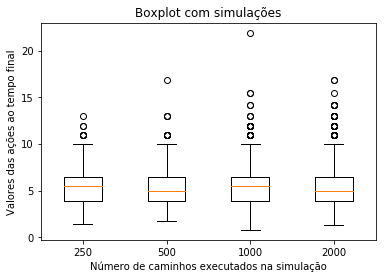

In [125]:
u_n = np.sqrt(u)
d_n = np.sqrt(d)
dt_n = dt/2
for j in [250,500,1000,2000]:
    vs[1].append([binomial(S0, T, dt_n, u_n, d_n, p)[-1] for i in range(0,j)])

plt.boxplot(vs[1])

plt.title('Boxplot com simulações')
plt.ylabel('Valores das ações ao tempo final')
plt.xlabel('Número de caminhos executados na simulação')
plt.xticks([1,2,3,4],[250,500,1000,2000])
plt.show()

In [126]:
np.mean(vs[1][0])

5.489027709163725

In [127]:
## Função para calcular a esperança
def esperanca(p_e,u_e,d_e,S0_e,n_e):
    return ((p_e*u_e+(1-p_e)*d_e)**n_e)*S0_e

In [128]:
e = [0,0]
e[0] = esperanca(p,u,d,S0,T)
e[1] = esperanca(p,u_n,d_n,S0,T)

In [129]:
ts = np.linspace(250,2000,4)

ys = [[],[]]
for j in [0,1]:
    for i in vs[j]:
        ys[j].append(abs((np.mean(i)-e[j])))

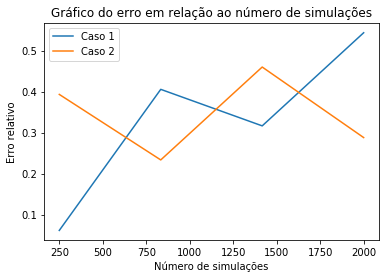

In [133]:
plt.plot(ts,ys[0],label='Caso 1')
plt.plot(ts,ys[1], label='Caso 2')
plt.title('Gráfico do erro em relação ao número de simulações')
plt.xlabel('Número de simulações')
plt.ylabel('Erro relativo')
plt.legend()
plt.show()

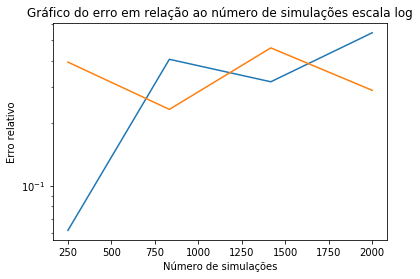

In [131]:
plt.semilogy(ts,ys[0],label='Caso 1')
plt.semilogy(ts,ys[1], label='Caso 2')
plt.legend()
plt.title('Gráfico do erro em relação ao número de simulações escala log')
plt.xlabel('Número de simulações')
plt.ylabel('Erro relativo')
plt.show()